In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns     
sns.set_style('whitegrid')

import re             
import nltk           
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_suthdet/Suicide_Detection.csv')

In [5]:
df = data

In [6]:
id(df)

140016800993088

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [8]:
df.head(8)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide


In [9]:
df.tail(8)

,Unnamed: 0,text,class
232066,348098,My mom tried to kill herself today. I feel los...,suicide
232067,348100,I’m a fucking scummy person and I can’t change...,suicide
232068,348101,I did something today I went sledding with my ...,non-suicide
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide
232073,348110,I still haven't beaten the first boss in Hollo...,non-suicide


In [10]:
df.shape

(232074, 3)

In [11]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [12]:
df= df.drop('Unnamed: 0',1)

<ipython-input-12-9ba57234f6cf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('Unnamed: 0',1)


In [13]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [14]:
labelling ={
    'non-suicide':0,
    'suicide':1
}
df['label'] = df['class'].map(labelling)

In [15]:
df.head(8)

,text,class,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,Am I weird I don't get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,i need helpjust help me im crying so hard,suicide,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
5,Honetly idkI dont know what im even doing here...,suicide,1
6,[Trigger warning] Excuse for self inflicted bu...,suicide,1
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,1


In [16]:
df['label'].value_counts()

1    116037
0    116037
Name: label, dtype: int64

In [17]:
df_0 =df[df['label'] == 0]
df_1 =df[df['label'] == 1]

In [18]:
df_0.shape

(116037, 3)

In [19]:
df_0

,text,class,label
1,Am I weird I don't get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,0
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,0
15,Fuck the verizon smart family app I can’t even...,non-suicide,0
17,"Well, Im screwed. I locked myself in the schoo...",non-suicide,0
...,...,...,...
232068,I did something today I went sledding with my ...,non-suicide,0
232069,If you don't like rock then your not going to ...,non-suicide,0
232070,You how you can tell i have so many friends an...,non-suicide,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,0


In [20]:
df_1.shape

(116037, 3)

In [21]:
df_1

,text,class,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
3,i need helpjust help me im crying so hard,suicide,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
5,Honetly idkI dont know what im even doing here...,suicide,1
6,[Trigger warning] Excuse for self inflicted bu...,suicide,1
...,...,...,...
232061,I’ve fucking had enough.None of this depressio...,suicide,1
232062,paralyzing anxiety &amp; depression are pushin...,suicide,1
232066,My mom tried to kill herself today. I feel los...,suicide,1
232067,I’m a fucking scummy person and I can’t change...,suicide,1


In [22]:
df_0 = df_0.sample(n=3500, random_state =0)
df_1 = df_1.sample(n=3500, random_state =0)

In [23]:
df_0, df_1

(                                                     text        class  label
 80854   First day of new school year Please unlive me\...  non-suicide      0
 113174  Just cut off the dude that makes me wanna kill...  non-suicide      0
 215271  Would you put ketchup or barbecue sauce on fis...  non-suicide      0
 84155   bruh I gotta figure out how to stop getting bo...  non-suicide      0
 19237   I FUCKING HATE MY BRAIN The story about this i...  non-suicide      0
 ...                                                   ...          ...    ...
 187597  How do u get over someone you know you'll neve...  non-suicide      0
 42248   To whoever keeps giving me gold.... Thanks I a...  non-suicide      0
 201543  So apparently it’s my fault that my mom lost h...  non-suicide      0
 120054  Anyone wanna start a discord? I have no idea w...  non-suicide      0
 156198  Girls belong in to the kitchen ! And boys too,...  non-suicide      0
 
 [3500 rows x 3 columns],
                        

In [24]:
df_merged = pd.concat([df_0, df_1], join ='inner', ignore_index = True)

In [25]:
df_merged

,text,class,label
0,First day of new school year Please unlive me\...,non-suicide,0
1,Just cut off the dude that makes me wanna kill...,non-suicide,0
2,Would you put ketchup or barbecue sauce on fis...,non-suicide,0
3,bruh I gotta figure out how to stop getting bo...,non-suicide,0
4,I FUCKING HATE MY BRAIN The story about this i...,non-suicide,0
...,...,...,...
6995,I just want to be goneI have a good life I gue...,suicide,1
6996,"Even though I can laugh, I don't feel anything...",suicide,1
6997,I ordered heroin to od onnot sure why I'm sayi...,suicide,1
6998,Please Help MeI can't go on like this anymore....,suicide,1


In [26]:
df_merged['label'].value_counts()

0    3500
1    3500
Name: label, dtype: int64

In [27]:
dff = df_merged

In [28]:
dff

,text,class,label
0,First day of new school year Please unlive me\...,non-suicide,0
1,Just cut off the dude that makes me wanna kill...,non-suicide,0
2,Would you put ketchup or barbecue sauce on fis...,non-suicide,0
3,bruh I gotta figure out how to stop getting bo...,non-suicide,0
4,I FUCKING HATE MY BRAIN The story about this i...,non-suicide,0
...,...,...,...
6995,I just want to be goneI have a good life I gue...,suicide,1
6996,"Even though I can laugh, I don't feel anything...",suicide,1
6997,I ordered heroin to od onnot sure why I'm sayi...,suicide,1
6998,Please Help MeI can't go on like this anymore....,suicide,1


In [29]:
for i in range(11):
  print(df['text'][i])

Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.
Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it
Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God it's so annoying
i need helpjust

In [30]:
from nltk.stem.porter import PorterStemmer
lemma = WordNetLemmatizer()
PS = PorterStemmer()

In [31]:
dff['text'] = dff['text'].apply(lambda x: ' '.join([comment for comment in str(x).split() if not comment.startswith('@')]))

In [32]:
def clean_text(text): 

  
  text = text.lower() 


  pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  text = pattern.sub('', text)
  
  
  text = re.sub(r"[,.\"!@$%^&*(){}?/;`~:<>+=-]", "", text)

  
  tokens = word_tokenize(text)
  
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]

  
  words = [ word for word in stripped if word.isalpha() ] 
  
  stop_words = set(stopwords.words("english"))
  words = [w for w in words if not w in stop_words]  

  #words = [lemma.lemmatize(w) for w in words]

 
  words = [PS.stem(w) for w in words] 
  
  words = ' '.join(words) 

  return words

In [33]:
dff['clean_text'] = dff['text'].apply(lambda text: clean_text(text))

In [34]:
for i in range(11):
  print(dff['clean_text'][i])

first day new school year pleas unliv filler filler filler filler filler filler filler filler filler filler filler filler
cut dude make wan na kill time happier biggest piec shit ever happi best friend live peac without like ah cut ass think fine done thing done also toxic friend get better trust
would put ketchup barbecu sauc fish would consid abomin societi
bruh got ta figur stop get bone everytim hear girlfriend voic h e l p
fuck hate brain stori good dream good one fuck piec meat insid skull woke middl fuck night say pp goe broom broom want know dream
anyon els think concept race gender whole fuck garbag there liter need differenti peopl someth born especi doesnt matter racismsex even wors pointless let peopl arewanna
cute take compliment move
anyon wan na join gc slot left llllllllllllllllllmdjdjejiajhwuudidjdjdhdhudusjshwhwbwbehwehebebbeheheh
hour get readi nnn come tri die
mad cup noodl gt put paper back top noodl went move wait cook bitch ass decid nah ima burn person hand hand

In [35]:
dff['word_count'] = dff['clean_text'].apply(lambda x: len(x.split()))

In [36]:
dff.head(15)

,text,class,label,clean_text,word_count
0,First day of new school year Please unlive me ...,non-suicide,0,first day new school year pleas unliv filler f...,19
1,Just cut off the dude that makes me wanna kill...,non-suicide,0,cut dude make wan na kill time happier biggest...,33
2,Would you put ketchup or barbecue sauce on fis...,non-suicide,0,would put ketchup barbecu sauc fish would cons...,10
3,bruh I gotta figure out how to stop getting bo...,non-suicide,0,bruh got ta figur stop get bone everytim hear ...,15
4,I FUCKING HATE MY BRAIN The story about this i...,non-suicide,0,fuck hate brain stori good dream good one fuck...,25
5,Anyone else just think that the concepts of ra...,non-suicide,0,anyon els think concept race gender whole fuck...,26
6,you’re cute take the compliment and move on 🔫,non-suicide,0,cute take compliment move,4
7,Anyone wanna join a gc? Only 1 slot left. Llll...,non-suicide,0,anyon wan na join gc slot left lllllllllllllll...,8
8,7.5 hours Get ready. NNN is coming. Try not to...,non-suicide,0,hour get readi nnn come tri die,7
9,I’m mad at my cup of noodles &gt;:( So I was p...,non-suicide,0,mad cup noodl gt put paper back top noodl went...,23


In [37]:
dff.tail(15)

,text,class,label,clean_text,word_count
6985,"Planning it, but hurt right nowI dont really h...",suicide,1,plan hurt right nowi dont realli anyon els tal...,94
6986,I Have Tried So HardI am 23 years old and I ha...,suicide,1,tri hardi year old suicid sinc probabl longer ...,55
6987,I feel terribleUsually i have so many thoughts...,suicide,1,feel terribleusu mani thought nt even know wri...,111
6988,Need advice pleaseThis is the fourth time rewr...,suicide,1,need advic pleasethi fourth time rewrit sorri ...,194
6989,"I need to get to Wednesday, please helpI made ...",suicide,1,need get wednesday pleas helpi made promis psy...,71
6990,I need someone to talk to...I was abused by my...,suicide,1,need someon talk toi abus mother father grow m...,185
6991,"feeling badhello guys,i feel pretty helpless a...",suicide,1,feel badhello guysi feel pretti helpless momen...,197
6992,I asked two friends for help. One doesnt want ...,suicide,1,ask two friend help one doesnt want talk lefti...,14
6993,I don’t know what to doSorry for the long ramb...,suicide,1,know dosorri long rambl post know start strugg...,138
6994,spiraling depressionSo I have had the feeling ...,suicide,1,spiral depressionso feel thing ever get wors r...,37


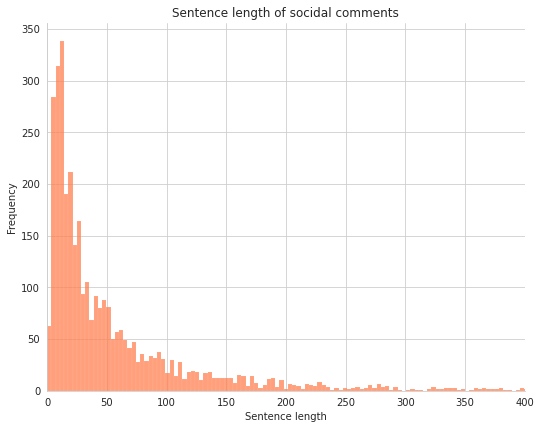

In [38]:
sns.displot(data = dff, x = dff.word_count[ df['label'] == 1 ], bins=400, color='coral')
plt.gcf().set_size_inches(8, 6)

plt.xlim(0, 400)
plt.title('Sentence length of socidal comments')
plt.xlabel('Sentence length')
plt.ylabel('Frequency');

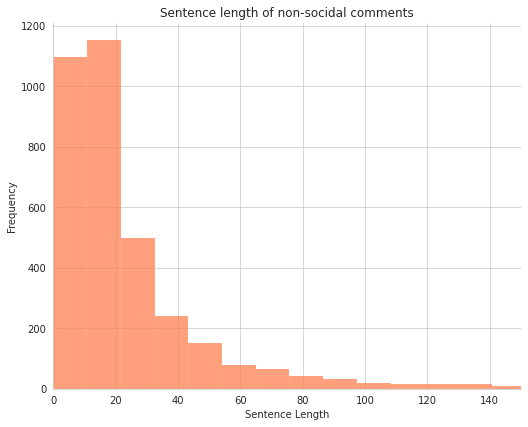

In [39]:
sns.displot(data = dff, x = dff.word_count[ dff['label'] == 0 ], bins=400, color='coral')
plt.gcf().set_size_inches(8, 6)

plt.xlim(0, 150)
plt.title('Sentence length of non-socidal comments')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency');

In [40]:
dff.isna().sum()

text          0
class         0
label         0
clean_text    0
word_count    0
dtype: int64

In [41]:
X = dff['clean_text']
Y = dff['label'].values

In [42]:
X.shape, Y.shape

((7000,), (7000,))

In [43]:
from tensorflow.keras.preprocessing import text, sequence
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from keras import backend as K
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Flatten, Conv1D, GlobalMaxPooling1D, MaxPooling1D, SpatialDropout1D, GRU, Bidirectional
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [44]:
def sequence_text(
                  clean_text: pd.Series, 
                  label: pd.Series, 
                  max_sen_length: int = 60, 
                  padding: str = 'post'):

  sentences = []
  tokenizer = Tokenizer()
  lines = clean_text.values.tolist()

  # looping through the column and tokenize the word
  for line in lines :
    tokens = word_tokenize(line)
    sentences.append(tokens)

  # sequences
  tokenizer.fit_on_texts(sentences)
  sequences = tokenizer.texts_to_sequences(sentences)
  padded_sentence = pad_sequences(sequences, maxlen = max_sen_length, padding = padding)

  # shuffling X, Y
  indices = np.arange(padded_sentence.shape[0])
  np.random.shuffle(indices)

  # assinging feature and target 
  X = padded_sentence[indices]
  Y = label[indices]
  
  prepocessing_data = {
      'X': X,
      'Y': Y,
      'sentences': sentences,
      'tokenizer': tokenizer
  } 

  return prepocessing_data

In [45]:
data = sequence_text(dff['clean_text'], dff.label)

In [46]:
data['X'].shape, data['Y'].shape

((7000, 60), (7000,))

In [47]:
data.keys()

dict_keys(['X', 'Y', 'sentences', 'tokenizer'])

In [48]:
MAX_SEN_LENGHT = 60
EMBEDDING_DIM = 100

In [49]:
# training word embedding model

model_wv = Word2Vec(sentences = data['sentences'], 
                                  vector_size=100, 
                                  workers=4, 
                                  sg=1, 
                                  epochs=10) #sg= 1:skip-gram 0:cbow
                                  

In [50]:
model_wv.wv.most_similar('miss')

[('sadli', 0.5887115001678467),
 ('werent', 0.5658426880836487),
 ('core', 0.5509902238845825),
 ('donei', 0.5491158366203308),
 ('soo', 0.5423747897148132),
 ('except', 0.5407904982566833),
 ('saint', 0.5401884913444519),
 ('memi', 0.5401256084442139),
 ('would', 0.5399231314659119),
 ('overprotect', 0.5391483306884766)]

In [51]:
filename = "suicidal_taught_word2vec.txt"
model_wv.wv.save_word2vec_format(filename, binary=False)

In [52]:
embedding_index = {}
with open(os.path.join('', 'suicidal_taught_word2vec.txt'),  encoding = "utf-8") as f:
  for line in f:
      values = line.split()
      word = values[0]
      coeff = np.asarray(values[1:], dtype='float32')
      embedding_index[word] = coeff

embedding_matrix = np.zeros((len(data['tokenizer'].word_index) + 1, EMBEDDING_DIM))
for word, i in data['tokenizer'].word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(data['tokenizer'].word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEN_LENGHT,
                            trainable=False)

In [53]:
# Spliting our Data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(data['X'], data['Y'], test_size=0.3, random_state=47) 

In [54]:
# xtrain.shape , 
xtrain.shape, ytrain.shape

((4900, 60), (4900,))

In [55]:
# Creating this function for model validation

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [56]:
import keras
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import regularizers

In [57]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# reducelr = ReduceLROnPlateau(patience=5)

In [58]:
dnn = Sequential()
dnn.add(embedding_layer)
dnn.add(Dropout(0.3))
dnn.add(Flatten())
dnn.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.0010),\
                                 bias_regularizer = regularizers.l2(0.0010)))
dnn.add(Dropout(0.3))
dnn.add(Dense(64, activation='relu'))
dnn.add(Dropout(0.3))
# output layer
dnn.add(Dense(1, activation='sigmoid'))

# compile the model
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m]) #f1_m,precision_m, recall_m])

# fit the model
history_dnn = dnn.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, verbose=1, batch_size=64, callbacks = [early_stop])


Epoch 1/20
77/77 [==============================] - 4s 26ms/step - loss: 0.6046 - acc: 0.8296 - f1_m: 0.8244 - precision_m: 0.8399 - recall_m: 0.8228 - val_loss: 0.4773 - val_acc: 0.8748 - val_f1_m: 0.8748 - val_precision_m: 0.8813 - val_recall_m: 0.8700
Epoch 2/20
77/77 [==============================] - 2s 21ms/step - loss: 0.4099 - acc: 0.9061 - f1_m: 0.9049 - precision_m: 0.9043 - recall_m: 0.9098 - val_loss: 0.4476 - val_acc: 0.8776 - val_f1_m: 0.8736 - val_precision_m: 0.9081 - val_recall_m: 0.8438
Epoch 3/20
77/77 [==============================] - 2s 23ms/step - loss: 0.3458 - acc: 0.9239 - f1_m: 0.9215 - precision_m: 0.9270 - recall_m: 0.9193 - val_loss: 0.4650 - val_acc: 0.8776 - val_f1_m: 0.8706 - val_precision_m: 0.9320 - val_recall_m: 0.8190
Epoch 4/20
77/77 [==============================] - 2s 28ms/step - loss: 0.3076 - acc: 0.9304 - f1_m: 0.9275 - precision_m: 0.9343 - recall_m: 0.9231 - val_loss: 0.4541 - val_acc: 0.8724 - val_f1_m: 0.8655 - val_precision_m: 0.9208 - v

In [59]:
# evaluate the model
loss_dnn, accuracy_dnn, f1_score_dnn, precision_dnn, recall_dnn = dnn.evaluate(xtest, ytest, verbose=1)

66/66 [==============================] - 0s 4ms/step - loss: 0.5018 - acc: 0.8824 - f1_m: 0.8841 - precision_m: 0.8773 - recall_m: 0.8969


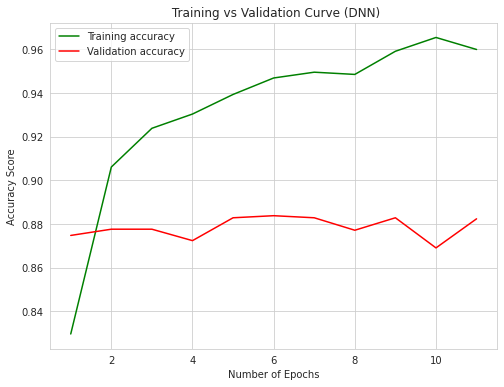

In [60]:
acc = history_dnn.history['acc']
val_acc = history_dnn.history['val_acc']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 6))

# plt.ylim(0.6, 0.90)
plt.plot(epochs, acc, 'g', label='Training accuracy', )
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(' Training vs Validation Curve (DNN)')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [61]:
y_pred_d = dnn.predict(xtest)

66/66 [==============================] - 2s 15ms/step


In [62]:
y_pred_d.shape

(2100, 1)

In [63]:
y_pred_dnn = np.where(y_pred_d > .5, 1, 0)

In [64]:
y_pred_dnn.shape

(2100, 1)

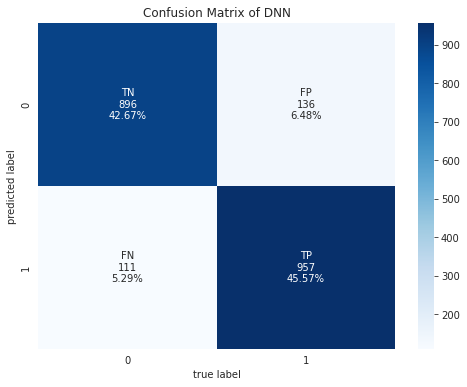

In [65]:
cf_matrix = confusion_matrix(ytest, y_pred_dnn)

plt.figure(figsize=(8, 6))

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


plt.title('Confusion Matrix of DNN')
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.savefig('DNN_conf_matrix', dpi=300)

In [66]:
cnn = Sequential()
cnn.add(embedding_layer) 
cnn.add(Conv1D(filters=128, kernel_size=5, padding='same', activation="relu"))

cnn.add(GlobalMaxPooling1D())
cnn.add(Dropout(0.3))
cnn.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.0010),\
                                 bias_regularizer = regularizers.l2(0.0010)))
# cnn.add(Dropout(0.3))
# cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.0002),\
                                 bias_regularizer = regularizers.l2(0.0002)))

# compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])

# fit the model
history_cnn = cnn.fit(xtrain, ytrain, validation_data=(xtest, ytest) , epochs=20, verbose=1, batch_size=64, callbacks=[early_stop])

Epoch 1/20
77/77 [==============================] - 7s 71ms/step - loss: 0.6569 - acc: 0.7084 - f1_m: 0.7240 - precision_m: 0.7022 - recall_m: 0.7722 - val_loss: 0.4010 - val_acc: 0.8800 - val_f1_m: 0.8799 - val_precision_m: 0.8872 - val_recall_m: 0.8744
Epoch 2/20
77/77 [==============================] - 3s 40ms/step - loss: 0.3889 - acc: 0.8873 - f1_m: 0.8859 - precision_m: 0.8857 - recall_m: 0.8903 - val_loss: 0.3576 - val_acc: 0.8933 - val_f1_m: 0.8983 - val_precision_m: 0.8701 - val_recall_m: 0.9306
Epoch 3/20
77/77 [==============================] - 3s 40ms/step - loss: 0.3152 - acc: 0.9147 - f1_m: 0.9111 - precision_m: 0.9148 - recall_m: 0.9106 - val_loss: 0.3404 - val_acc: 0.8995 - val_f1_m: 0.9039 - val_precision_m: 0.8800 - val_recall_m: 0.9313
Epoch 4/20
77/77 [==============================] - 3s 37ms/step - loss: 0.2713 - acc: 0.9288 - f1_m: 0.9266 - precision_m: 0.9344 - recall_m: 0.9219 - val_loss: 0.3069 - val_acc: 0.9090 - val_f1_m: 0.9102 - val_precision_m: 0.9104 - v

In [67]:
# evaluate the model
loss_cnn, accuracy_cnn, f1_score_cnn, precision_cnn, recall_cnn = cnn.evaluate(xtest, ytest, verbose=1)

66/66 [==============================] - 1s 13ms/step - loss: 0.4123 - acc: 0.8881 - f1_m: 0.8793 - precision_m: 0.9422 - recall_m: 0.8318


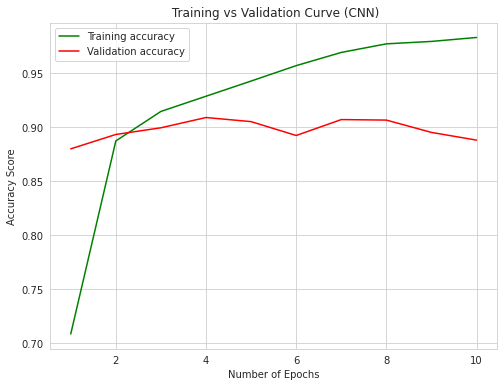

In [68]:
acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 6))

# plt.ylim(0.6, 0.90)
plt.plot(epochs, acc, 'g', label='Training accuracy', )
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(' Training vs Validation Curve (CNN)')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [69]:
y_pred_cnn = cnn.predict(xtest)
y_pred_c = np.where(y_pred_cnn > .5, 1, 0)

66/66 [==============================] - 1s 12ms/step


In [70]:
y_pred_cnn

array([[9.9085933e-01],
       [3.4197754e-01],
       [9.9818456e-01],
       ...,
       [4.1138212e-04],
       [9.9836153e-01],
       [9.9954450e-01]], dtype=float32)

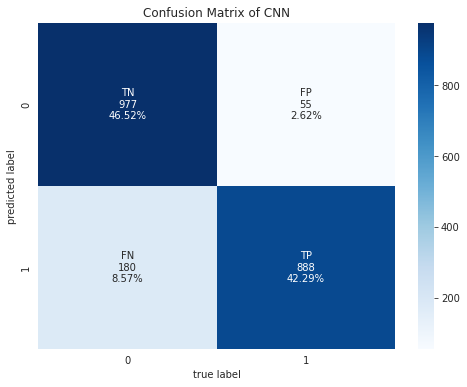

In [71]:
cf_matrix = confusion_matrix(ytest, y_pred_c)

plt.figure(figsize=(8, 6))

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


plt.title('Confusion Matrix of CNN')
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.savefig('CNN_conf_matrix', dpi=300)

In [72]:
model_LSTM = Sequential()
model_LSTM.add(embedding_layer)                       
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True,))                              
model_LSTM.add(Flatten())
model_LSTM.add(Dropout(0.4))
model_LSTM.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.0010),\
                                 bias_regularizer = regularizers.l2(0.0010)))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(Dense(1, activation='sigmoid'))

# compile the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])

# fit the model
history_lstm = model_LSTM.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, verbose=1, batch_size=64, callbacks=[early_stop])

Epoch 1/20
77/77 [==============================] - 26s 289ms/step - loss: 0.4322 - acc: 0.8592 - f1_m: 0.8519 - precision_m: 0.8678 - recall_m: 0.8485 - val_loss: 0.3427 - val_acc: 0.8905 - val_f1_m: 0.8889 - val_precision_m: 0.9123 - val_recall_m: 0.8685
Epoch 2/20
77/77 [==============================] - 22s 287ms/step - loss: 0.3224 - acc: 0.8982 - f1_m: 0.8962 - precision_m: 0.9005 - recall_m: 0.8971 - val_loss: 0.3151 - val_acc: 0.8905 - val_f1_m: 0.8877 - val_precision_m: 0.9186 - val_recall_m: 0.8610
Epoch 3/20
77/77 [==============================] - 20s 266ms/step - loss: 0.2963 - acc: 0.9033 - f1_m: 0.9007 - precision_m: 0.9052 - recall_m: 0.9001 - val_loss: 0.2911 - val_acc: 0.8957 - val_f1_m: 0.8948 - val_precision_m: 0.9075 - val_recall_m: 0.8845
Epoch 4/20
77/77 [==============================] - 23s 296ms/step - loss: 0.2754 - acc: 0.9092 - f1_m: 0.9067 - precision_m: 0.9153 - recall_m: 0.9010 - val_loss: 0.2991 - val_acc: 0.8990 - val_f1_m: 0.8972 - val_precision_m: 0.

In [73]:
# evaluate the model
loss_lstm, accuracy_lstm, f1_score_lstm, precision_lstm, recall_lstm = model_LSTM.evaluate(xtest, ytest, verbose=1)

66/66 [==============================] - 2s 28ms/step - loss: 0.2999 - acc: 0.8976 - f1_m: 0.9002 - precision_m: 0.8831 - recall_m: 0.9237


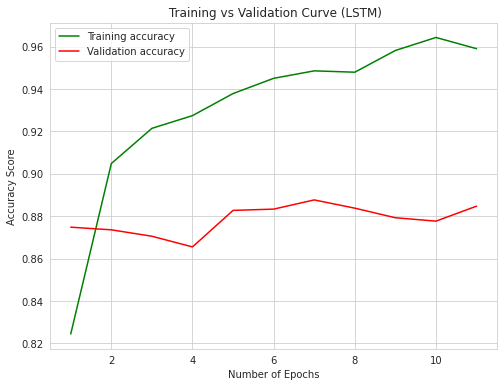

In [74]:
acc = history_dnn.history['f1_m']
val_acc = history_dnn.history['val_f1_m']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 6))

# plt.ylim(0.6, 0.90)
plt.plot(epochs, acc, 'g', label='Training accuracy', )
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(' Training vs Validation Curve (LSTM)')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [75]:
y_pred_lstm = model_LSTM.predict(xtest)
y_pred_l = np.where(y_pred_lstm > .5, 1, 0)

66/66 [==============================] - 2s 27ms/step


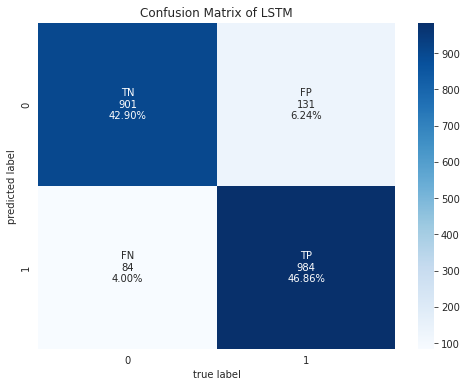

In [76]:
cf_matrix = confusion_matrix(ytest, y_pred_l)

plt.figure(figsize=(8, 6))

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


plt.title('Confusion Matrix of LSTM')
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.savefig('LSTM_conf_matrix', dpi=300)

In [77]:
model_GRU = Sequential()
model_GRU.add(embedding_layer)

model_GRU.add(GRU(128, return_sequences=True))
model_GRU.add(Dropout(0.3))  
model_GRU.add(Flatten())
model_GRU.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.0010),\
                                 bias_regularizer = regularizers.l2(0.0010)))
model_GRU.add(Dropout(0.4))
model_GRU.add(Dense(1,activation='sigmoid'))

# compile the model
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])#f1_m,precision_m, recall_m])

# fit the model
history_gru = model_GRU.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=20, verbose=1, batch_size=64, callbacks=[early_stop])

Epoch 1/20
77/77 [==============================] - 17s 188ms/step - loss: 0.4331 - acc: 0.8606 - f1_m: 0.8560 - precision_m: 0.8671 - recall_m: 0.8555 - val_loss: 0.3556 - val_acc: 0.8857 - val_f1_m: 0.8903 - val_precision_m: 0.8657 - val_recall_m: 0.9183
Epoch 2/20
77/77 [==============================] - 14s 180ms/step - loss: 0.3218 - acc: 0.9006 - f1_m: 0.8980 - precision_m: 0.9023 - recall_m: 0.8975 - val_loss: 0.3240 - val_acc: 0.8957 - val_f1_m: 0.8933 - val_precision_m: 0.9225 - val_recall_m: 0.8678
Epoch 3/20
77/77 [==============================] - 14s 176ms/step - loss: 0.2752 - acc: 0.9176 - f1_m: 0.9146 - precision_m: 0.9190 - recall_m: 0.9129 - val_loss: 0.3145 - val_acc: 0.8986 - val_f1_m: 0.8960 - val_precision_m: 0.9295 - val_recall_m: 0.8668
Epoch 4/20
77/77 [==============================] - 14s 176ms/step - loss: 0.2485 - acc: 0.9263 - f1_m: 0.9242 - precision_m: 0.9250 - recall_m: 0.9265 - val_loss: 0.3136 - val_acc: 0.9000 - val_f1_m: 0.8990 - val_precision_m: 0.

In [78]:
# evaluate the model
loss_gru, accuracy_gru, f1_score_gru, precision_gru, recall_gru = model_GRU.evaluate(xtest, ytest, verbose=1)

66/66 [==============================] - 2s 26ms/step - loss: 0.3809 - acc: 0.8990 - f1_m: 0.8995 - precision_m: 0.9027 - recall_m: 0.9020


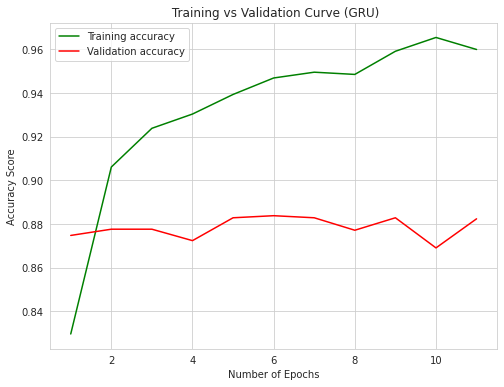

In [79]:
acc = history_dnn.history['acc']
val_acc = history_dnn.history['val_acc']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 6))

# plt.ylim(0.6, 0.90)
plt.plot(epochs, acc, 'g', label='Training accuracy', )
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(' Training vs Validation Curve (GRU)')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [80]:
y_pred_gru = model_LSTM.predict(xtest)
y_pred_g = np.where(y_pred_lstm > .5, 1, 0)

66/66 [==============================] - 2s 27ms/step


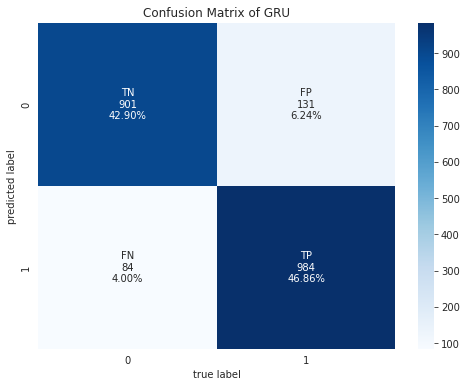

In [81]:
cf_matrix = confusion_matrix(ytest, y_pred_g)

plt.figure(figsize=(8, 6))

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


plt.title('Confusion Matrix of GRU')
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.savefig('GRU_conf_matrix', dpi=300)

In [82]:
y_pred_dnn = dnn.predict(xtest)

y_pred_cnn = cnn.predict(xtest)

y_pred_lstm = model_LSTM.predict(xtest)

y_pred_gru = model_GRU.predict(xtest)

66/66 [==============================] - 2s 21ms/step


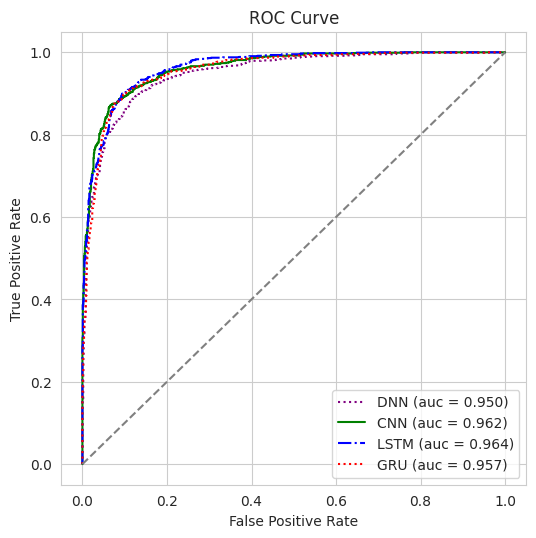

In [83]:
# ROC curve of ML baseline models

dnn_fpr, dnn_tpr, threshold = roc_curve(ytest, y_pred_dnn)
auc_dnn = auc(dnn_fpr, dnn_tpr)

cnn_fpr, cnn_tpr, threshold = roc_curve(ytest, y_pred_cnn)
auc_cnn = auc(cnn_fpr, cnn_tpr)

lstm_fpr, lstm_tpr, threshold = roc_curve(ytest, y_pred_lstm)
auc_lstm = auc(lstm_fpr, lstm_tpr)

gru_fpr, gru_tpr, threshold = roc_curve(ytest, y_pred_gru)
auc_gru = auc(gru_fpr, gru_tpr)

plt.figure(figsize=(6, 6), dpi=100)
plt.plot(dnn_fpr, dnn_tpr, color='purple', linestyle='dotted', label='DNN (auc = %0.3f)' % auc_dnn)
plt.plot(cnn_fpr, cnn_tpr, color='green', linestyle='solid', label='CNN (auc = %0.3f)' % auc_cnn)
plt.plot(lstm_fpr, lstm_tpr, color='blue', linestyle='dashdot' , label='LSTM (auc = %0.3f)' % auc_lstm)
plt.plot(gru_fpr, gru_tpr, linestyle='dotted' , color='red', label='GRU (auc = %0.3f)' % auc_gru)
plt.plot([0, 1], [0, 1], color='grey',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.title('ROC Curve')
plt.axis('tight')
plt.legend(loc = 'lower right')
plt.savefig('ROC-Curve', dpi=300)
plt.show()

In [84]:
evaluation = {
    
    'models': ['DNN', 'CNN', 'LSTM', 'GRU'],
    'scores': [accuracy_dnn, accuracy_cnn, accuracy_lstm, accuracy_gru]

}

In [85]:
evaluation['scores']

[0.8823809623718262,
 0.8880952596664429,
 0.8976190686225891,
 0.8990476131439209]